<a href="https://colab.research.google.com/github/padolekrushna/Projects_on_ML/blob/main/house_price_prediction_ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANGALORE HOUSE PRICE PREDICTION MODEL

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# LOAD DATASET

In [2]:
df1 = pd.read_csv("/content/bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### EXPLORATORY DATA ANALYSIS

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


**NOTE:** DROP UNNECESSARY FEATURES

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

### DATA CLEANING

In [8]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [9]:
df2.shape

(13320, 5)

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [11]:
df3.shape

(13246, 5)

In [12]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


#FEATURE ENGINEERING

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

<ipython-input-13-681cf3aca53d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [15]:
df3['total_sqft']


,total_sqft
0,1056
1,2600
2,1440
3,1521
4,1200
...,...
13315,3453
13316,3600
13317,1141
13318,4689


**ABOVE DATA SHOWS THAT TOTAL SQFT CAN BE A RANGE (E.G. 2100-2850). FOR SUCH CASES WE CAN JUST TAKE AVERAGE OF MIN & MAX VALUE IN THE RANGE. THERE ARE OTHER CASES WHERE VALUES ARE IN SQM WHICH CAN BE CONVERTED TO SQFT USING UNIT CONVERSION.**

###  1 Square foot is equal to 0.0023 Decimal
## Decimal = Square foot x 0.0023
##Usage:
If you input a string like "1000-1200", it will return 1100.0.                  
If you input "900", it will return 900.0.                                       
If you input an invalid string, it will return None.

In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


**FOR ROW BELOW, IT SHOWS TOTAL SQFT AS 2475 WHICH IS AN AVERAGE OF THE RANGE 2100-2850**

In [18]:
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [19]:
(2100+2850)/2

2475.0

**ADD NEW FEATURE CALLED PRICE PER SQUARE FEET**

price_per_sqft= price×100,000/total_sqft

multiplying by 100,000 adjusts the value to match the scale of the square footage

In [20]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

,price_per_sqft
count,1.320000e+04
mean,7.920759e+03
std,1.067272e+05
min,2.678298e+02
25%,4.267701e+03
50%,5.438331e+03
75%,7.317073e+03
max,1.200000e+07


In [22]:
df5.to_csv("bhp.csv",index=False)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**EXAMINE LOCATIONS WHICH IS A CATEGORICAL VARIABLE. WE NEED TO APPLY THE DIMENSIONALITY REDUCTION TECHNIQUE HERE TO REDUCE THE NUMBER OF LOCATIONS**

In [23]:
df5.location = df5.location.apply(lambda x: x.strip() if isinstance(x, str) else x)

#df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

,count
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
Rajanna Layout,1
Subramanyanagar,1
Lakshmipura Vidyaanyapura,1


In [24]:
location_stats.values.sum()

13200

In [25]:
len(location_stats[location_stats>10])

240

In [26]:
len(location_stats)

1287

In [27]:
len(location_stats[location_stats<=10])

1047

### DIMENSIONALITY REDUCTIONS

**ANY LOCATION HAVING LESS THAN 10 DATA PINTS SHOULD BE TAGGED AS "OTHER" LOCATION. THIS WAY NUMBER OF CATEGORIES CAN BE REDUCED BY HUGE AMOUNT. LATER ON WHEN WE DO ONE HOT ENCODING, IT WILL HELP US WITH HAVING FEWER DUMMY COLUMNS.**

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,
BTM 1st Stage,10
Gunjur Palya,10
Nagappa Reddy Layout,10
Sector 1 HSR Layout,10
Thyagaraja Nagar,10
...,...
Rajanna Layout,1
Subramanyanagar,1
Lakshmipura Vidyaanyapura,1


In [29]:
len(df5.location.unique())

1287

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
df5.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

### OUTLIER REMOVAL USING BUSINESS LOGIC

**AS A DATA SCIENTIST S A DATA SCIENTIST WHEN YOU HAVE A CONVERSATION WITH YOUR BUSINESS MANAGER (WHO HAS EXPERTISE IN REAL ESTATE), HE WILL TELL YOU THAT NORMALLY SQUARE FT PER BEDROOM IS 300 (I.E. 2 BHK APARTMENT IS MINIMUM 600 SQFT. IF YOU HAVE FOR EXAMPLE 400 SQFT APARTMENT WITH 2 BHK THAN THAT SEEMS SUSPICIOUS AND CAN BE REMOVED AS AN OUTLIER. WE WILL REMOVE SUCH OUTLIERS BY KEEPING OUR MINIMUM THRESOLD PER BHK TO BE 300 SQFT**

In [33]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


**CHECK THE ABOVE DATA POINTS. WE HAVE 6 BHK APARTMENTS WITH 1020 SQFT. ANOTHER ONE IS 8 BHK AND THE TOTAL SQFT IS 600. THESE ARE CLEAR DATA ERRORS THAT CAN BE REMOVED SAFELY**

In [34]:
df5.shape

(13200, 7)

In [35]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

### OUTLIER REMOVAL USING STANDARD DEVIATION AND MEAN

In [36]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


**HERE WE FIND THAT MIN PRICE PER SQFT IS 267 RS/SQFT WHEREAS MAX IS 12000000, THIS SHOWS A WIDE VARIATION IN PROPERTY PRICES. WE SHOULD REMOVE OUTLIERS PER LOCATION USING MEAN AND ONE STANDARD DEVIATION**

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

**LET'S CHECK IF FOR A GIVEN LOCATION HOW DOES THE 2 BHK AND 3 BHK PROPERTY PRICES LOOK LIKE**

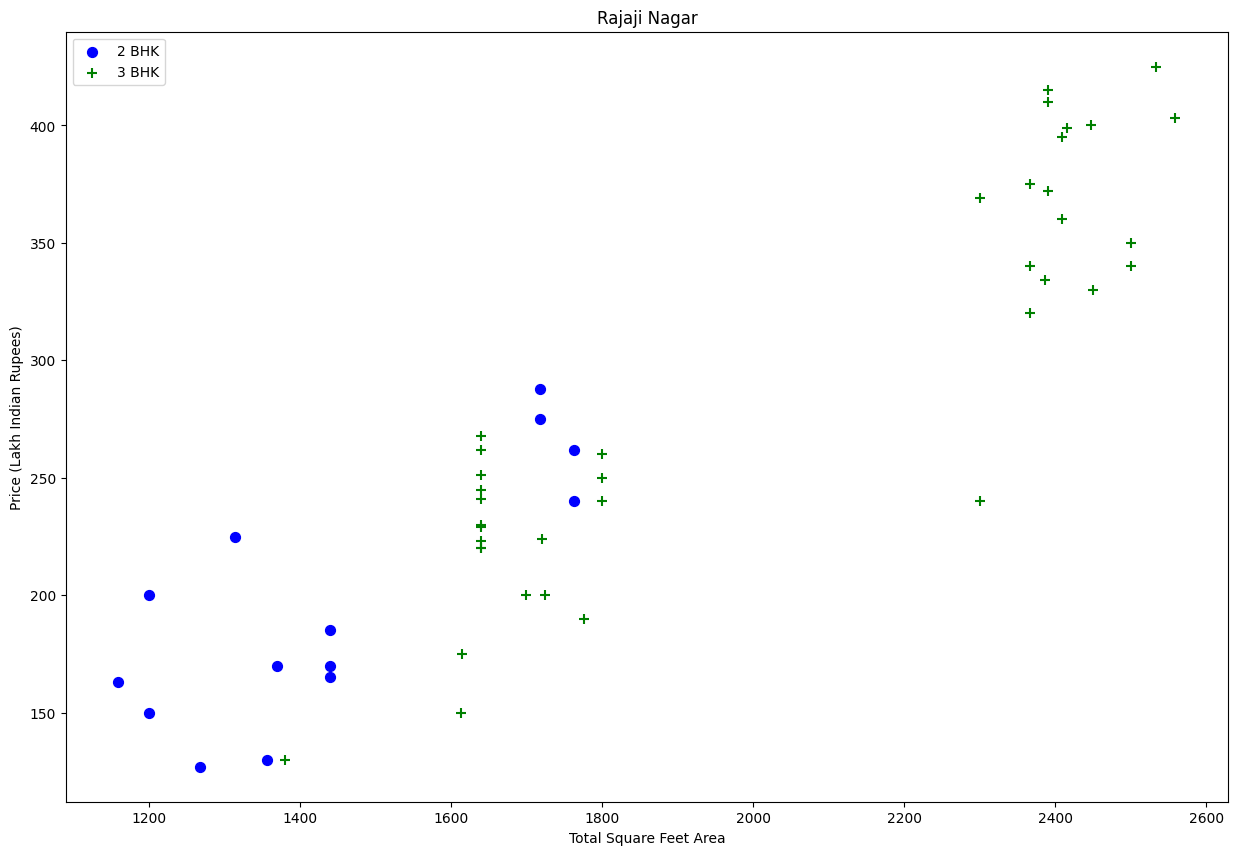

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

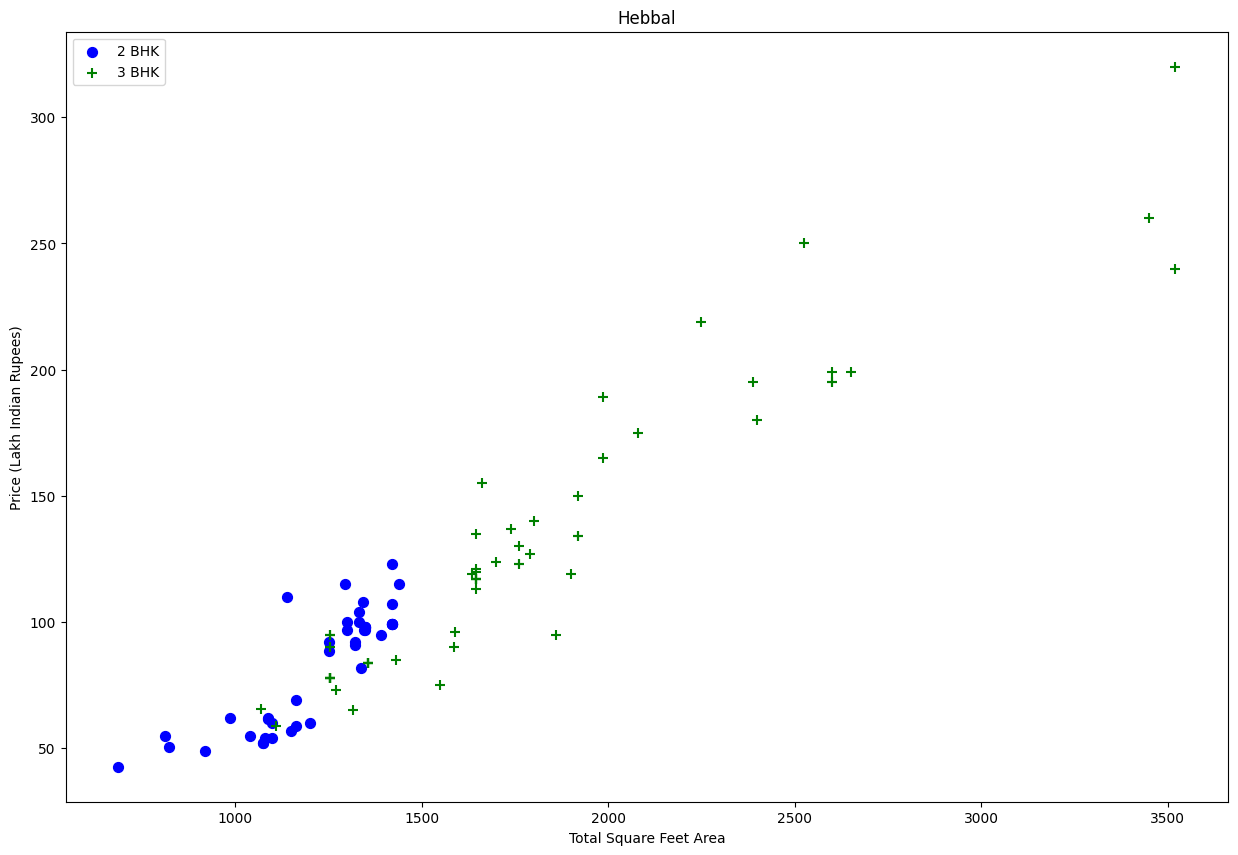

In [39]:
plot_scatter_chart(df7,"Hebbal")

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8 = df7.copy()
df8.shape

(10242, 7)

**PLOT SAME SCATTER CHART AGAIN TO VISUALIZE PRICE_PER_SQFT FOR 2 BHK AND 3 BHK PROPERTIES**

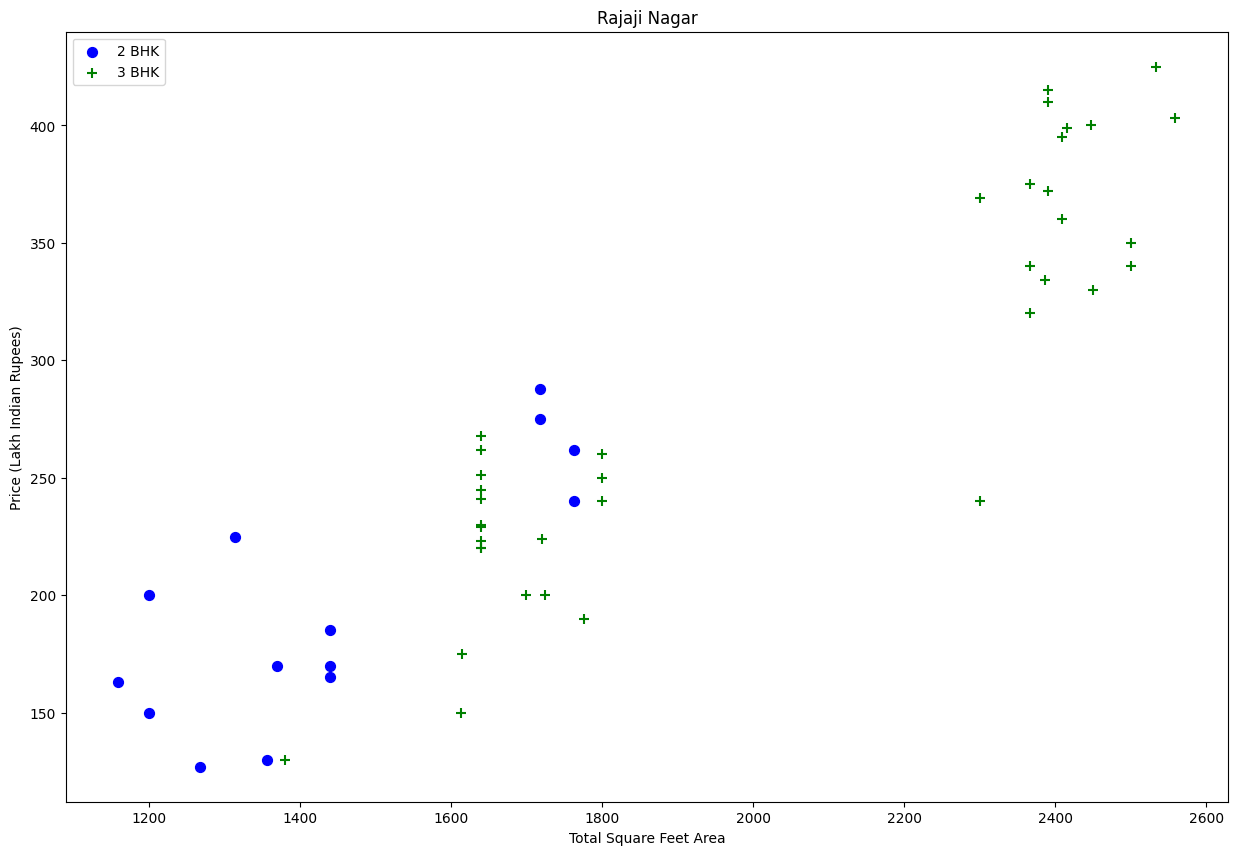

In [41]:
plot_scatter_chart(df8,"Rajaji Nagar")

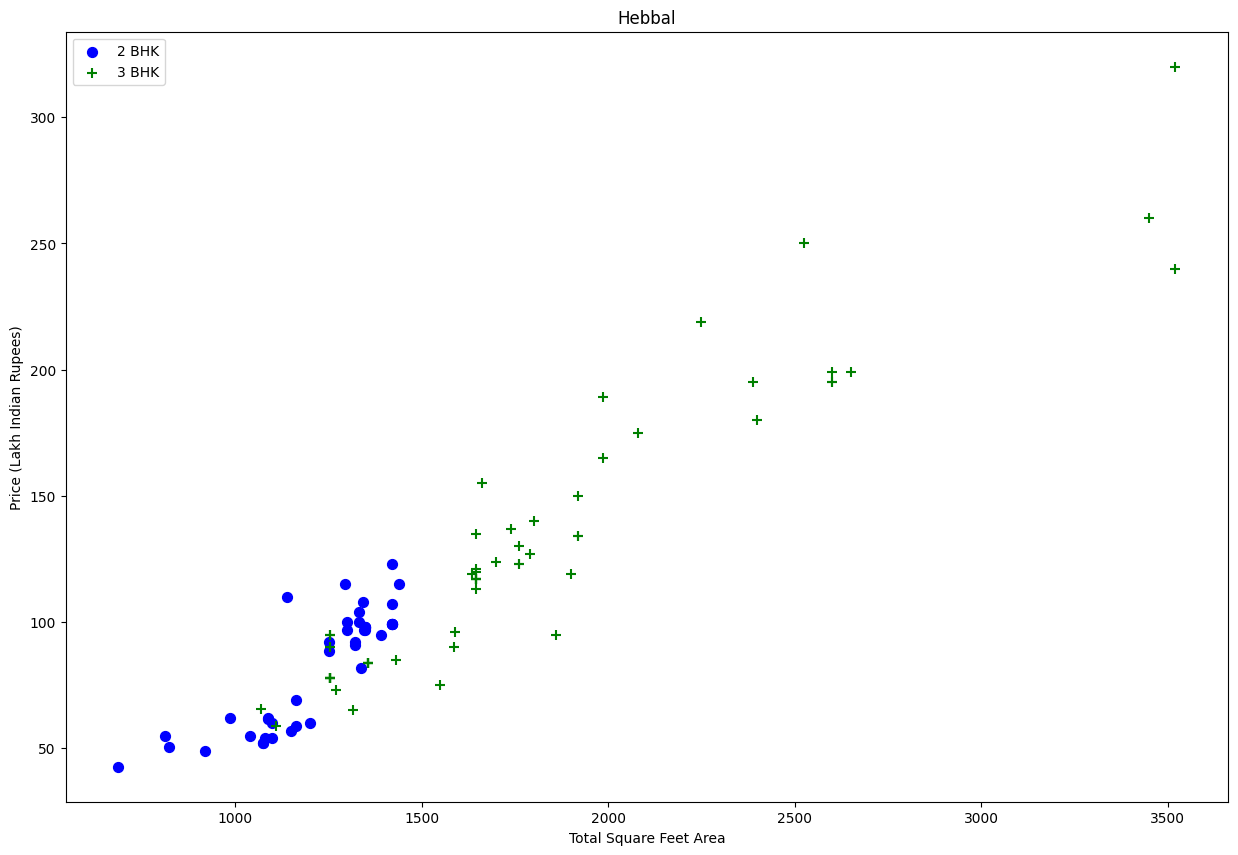

In [42]:
plot_scatter_chart(df8,"Hebbal")

**BASED ON ABOVE CHARTS WE CAN SEE THAT DATA POINTS HIGHLIGHTED IN RED BELOW ARE OUTLIERS AND THEY ARE BEING REMOVED DUE TO REMOVE_BHK_OUTLIERS FUNCTION**

Text(0, 0.5, 'Count')

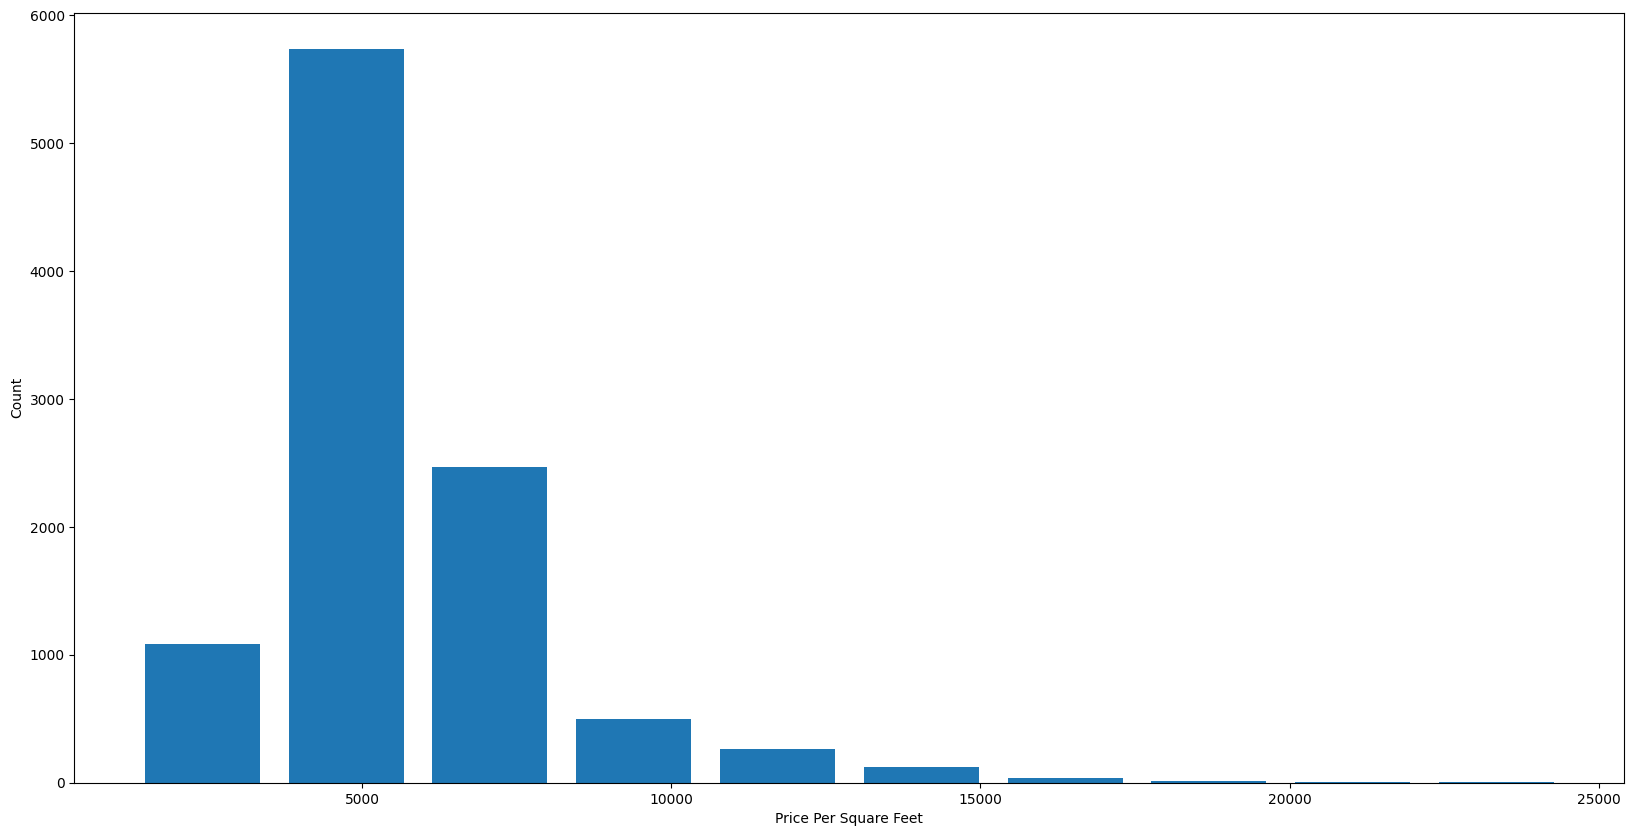

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### OUTLIER REMOVAL USING BATHROOMS FEATURE

In [44]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

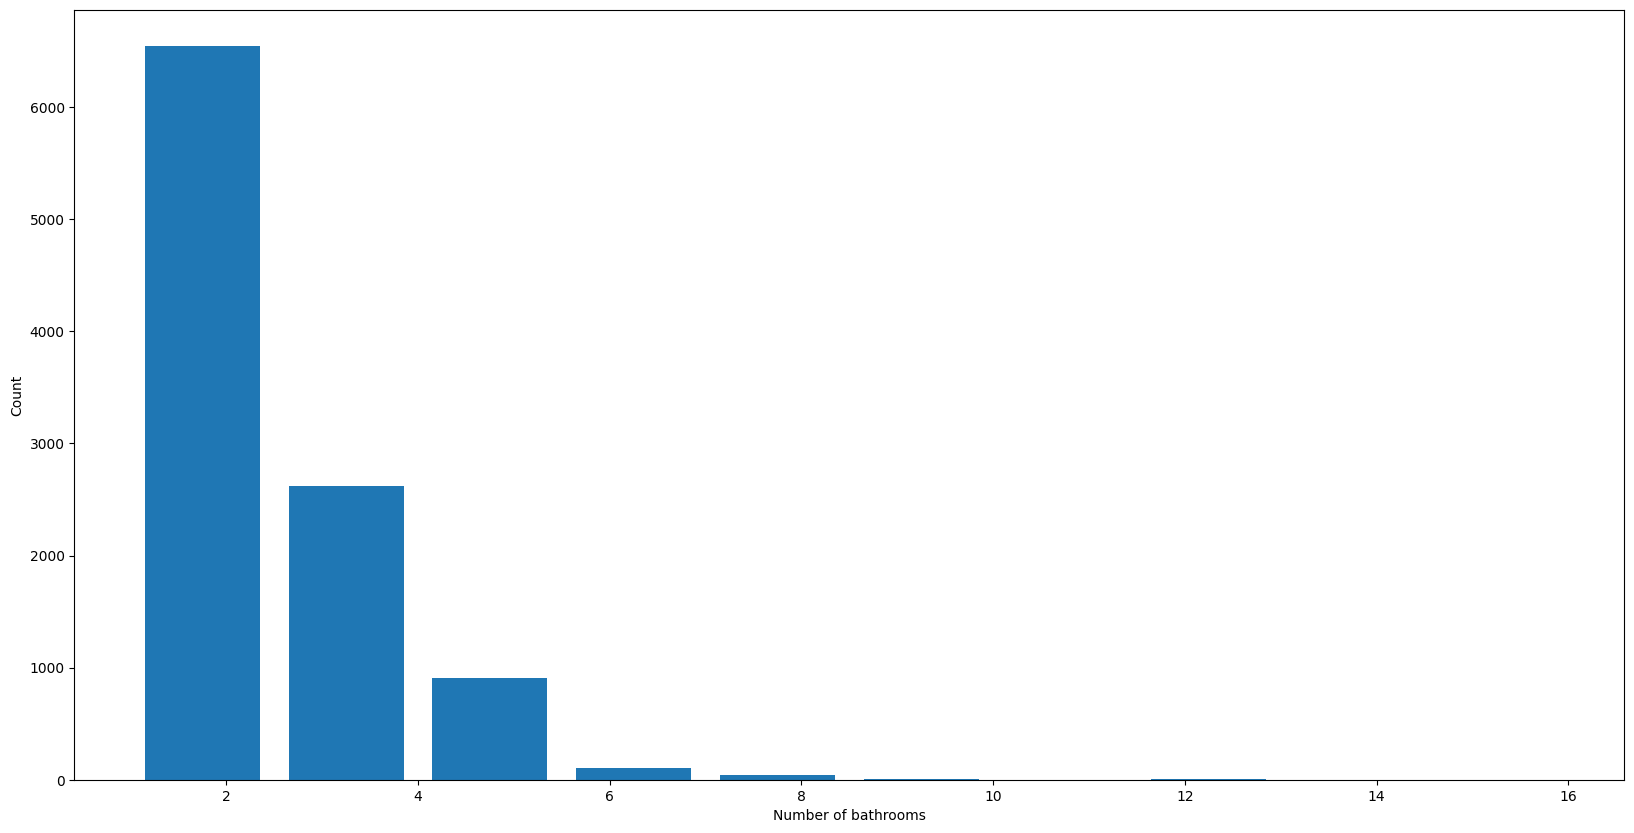

In [45]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [46]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**IT IS UNUSUAL TO HAVE 2 MORE BATHROOMS THAN NUMBER OF BEDROOMS IN A HOME**

In [47]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**AGAIN THE BUSINESS MANAGER HAS A CONVERSATION WITH YOU (I.E. A DATA SCIENTIST) THAT IF YOU HAVE A 4 BEDROOM HOME AND EVEN IF YOU HAVE A BATHROOM IN ALL 4 ROOMS PLUS ONE GUEST BATHROOM, YOU WILL HAVE A TOTAL BATH = TOTAL BED + 1 MAX. ANYTHING ABOVE THAT IS AN OUTLIER OR A DATA ERROR AND CAN BE REMOVED**

In [48]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(10148, 7)

In [49]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [50]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)
df10.location

,location
0,1st Block Jayanagar
1,1st Block Jayanagar
2,1st Block Jayanagar
3,1st Block Jayanagar
4,1st Block Jayanagar
...,...
10237,other
10238,other
10239,other
10240,other


### USE ONE HOT ENCODING FOR LOCATION

In [51]:
dummies = pd.get_dummies(df10.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#BUILDING A MODEL

In [54]:
df12.shape

(10148, 244)

In [55]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
X.shape

(10148, 243)

In [57]:
y = df12.price
y.head(3)

,price
0,428.0
1,194.0
2,235.0


In [58]:
len(y)

10148

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# LinearRegression

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.77832317811073

### USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LINEAR REGRESSION MODEL

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81567128, 0.87002069, 0.80226713, 0.82194915, 0.7501478 ])

**WE CAN SEE THAT IN 5 ITERATIONS WE GET A SCORE ABOVE 80% ALL THE TIME. THIS IS PRETTY GOOD BUT WE WANT TO TEST FEW OTHER ALGORITHMS FOR REGRESSION TO SEE IF WE CAN GET AN EVEN BETTER SCORE. WE WILL USE GRIDSEARCHCV FOR THIS PURPOSE**

##K-Nearest Neighbors (KNN) Regression model

In [62]:
# Import necessary libraries for KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize the KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-Squared: {r2:.2f}')


Mean Squared Error: 1611.3279184295566
R-Squared: 0.64


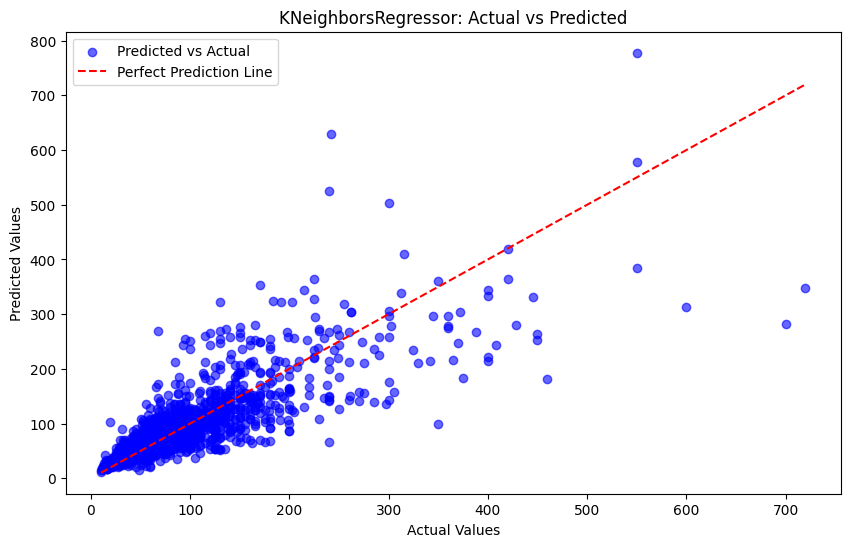

In [63]:
# Visualizing actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plotting a line for perfect prediction
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='--', label='Perfect Prediction Line')

# Adding titles and labels
plt.title('KNeighborsRegressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()

#Lasso and Ridge regression

In [64]:
from sklearn.linear_model import Lasso, Ridge
# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha value for regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the alpha value for regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate the models
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Ridge Regression MSE: {mse_ridge}')


Lasso Regression MSE: 1451.1262568857653
Ridge Regression MSE: 990.4993909917224


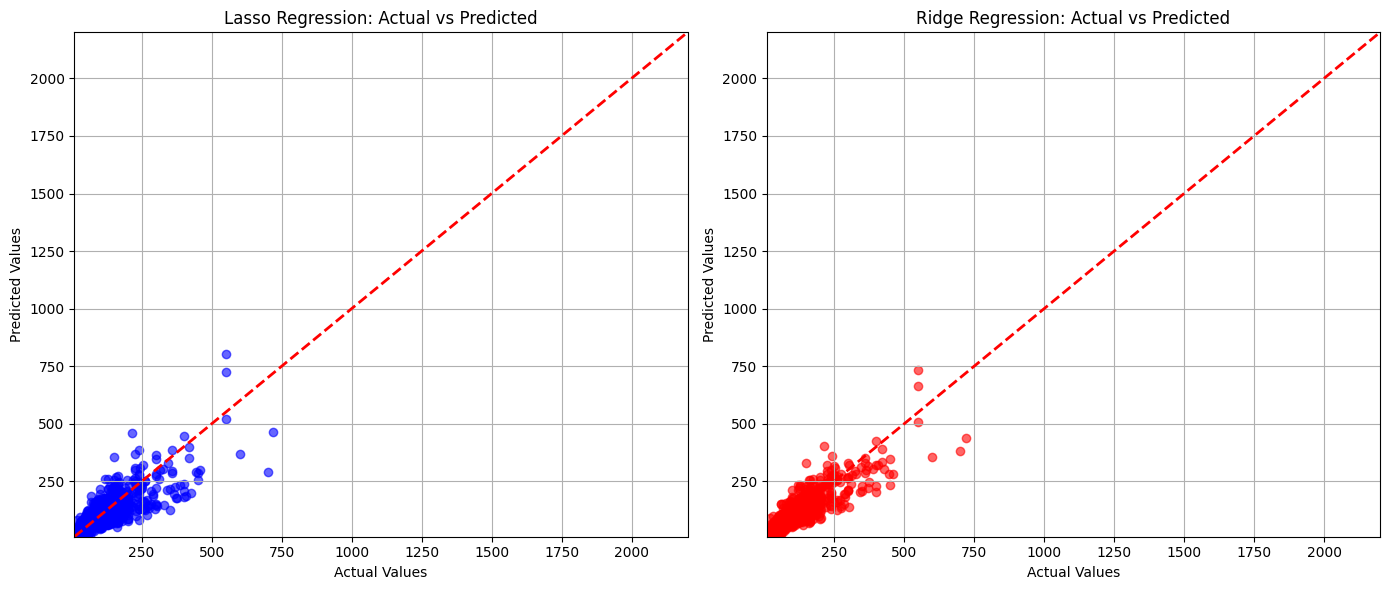

In [65]:
# Visualization
plt.figure(figsize=(14, 6))

# Scatter plot for Lasso Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # line of perfect prediction
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()

# Scatter plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # line of perfect prediction
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()

plt.tight_layout()
plt.show()

#SVM - REGRESSION

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
#Initialize the SVR model
model = SVR(kernel='poly')

In [68]:
model.fit(X_train, y_train)

SVR(kernel='poly')

In [69]:
y_pred = model.predict(X_test)

In [70]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 4699.94047571016
R² Score: -0.05055619189474858


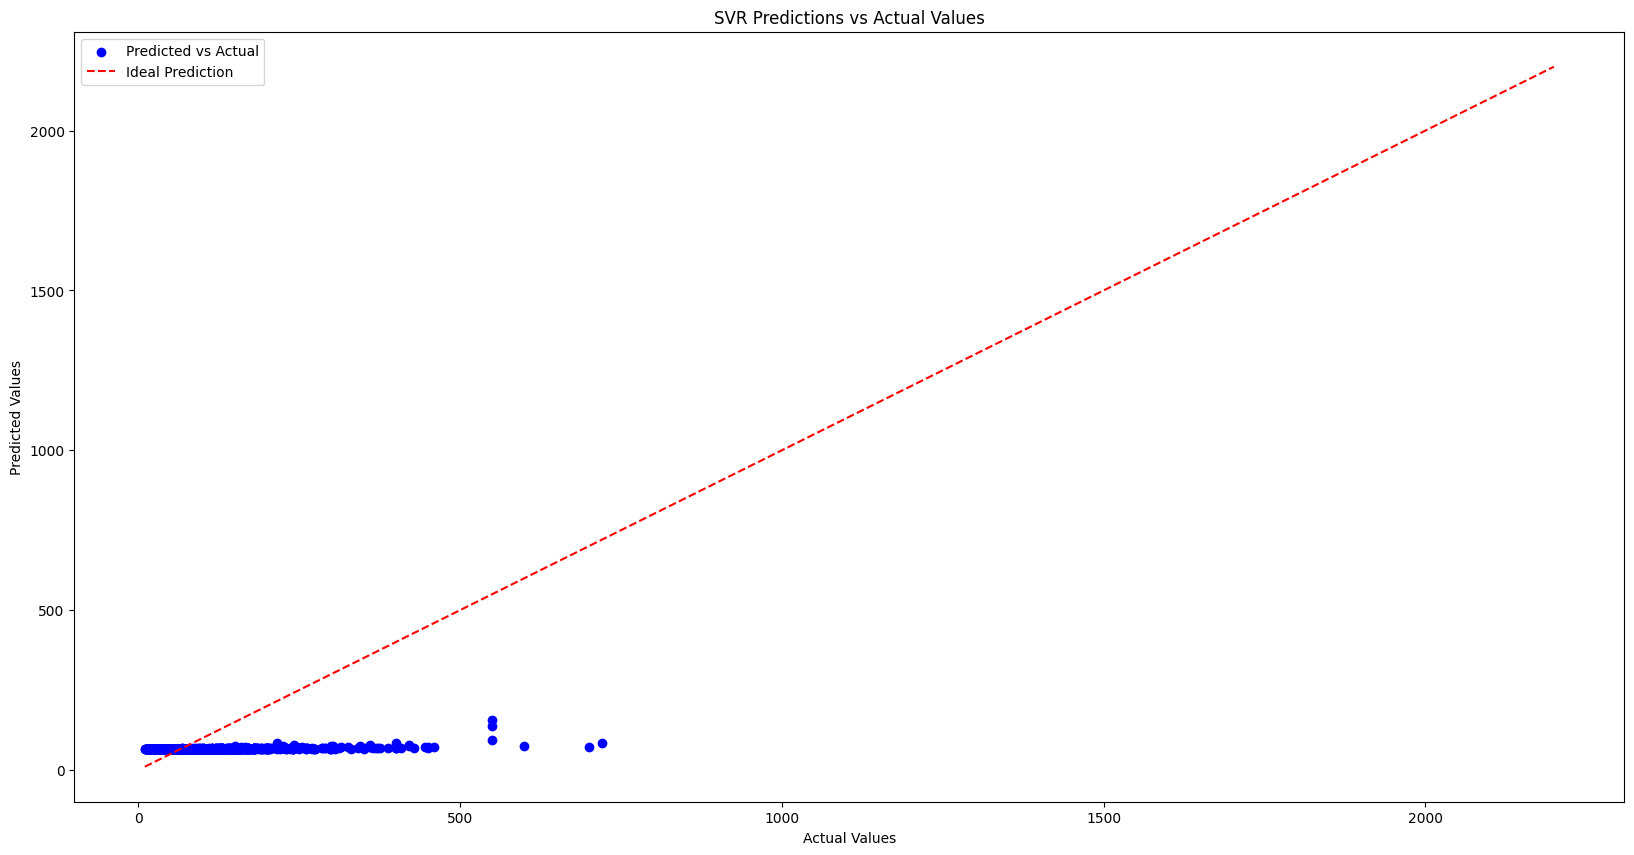

In [71]:
# Visualize the results
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Predictions vs Actual Values')
plt.legend()
plt.show()

#Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [74]:
y_pred = dt_model.predict(X_test)


In [75]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1594.146913462425
R-squared: 0.6436676337959792


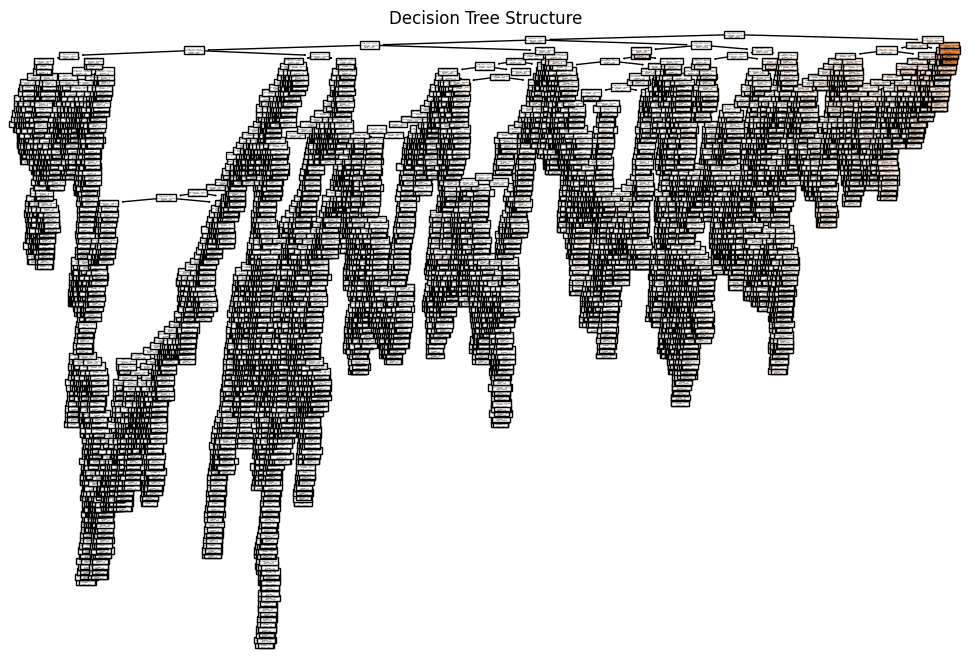

In [76]:
# Visualizing the decision tree (if the tree is small enough)
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.title('Decision Tree Structure')
plt.show()

#Random Forest Regression

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  #n_estimators = number of trees in the forest  #random_state = controls the randomness of the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
y_pred = rf_model.predict(X_test)


In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1181.0139389701794
R-squared: 0.7360133574645633


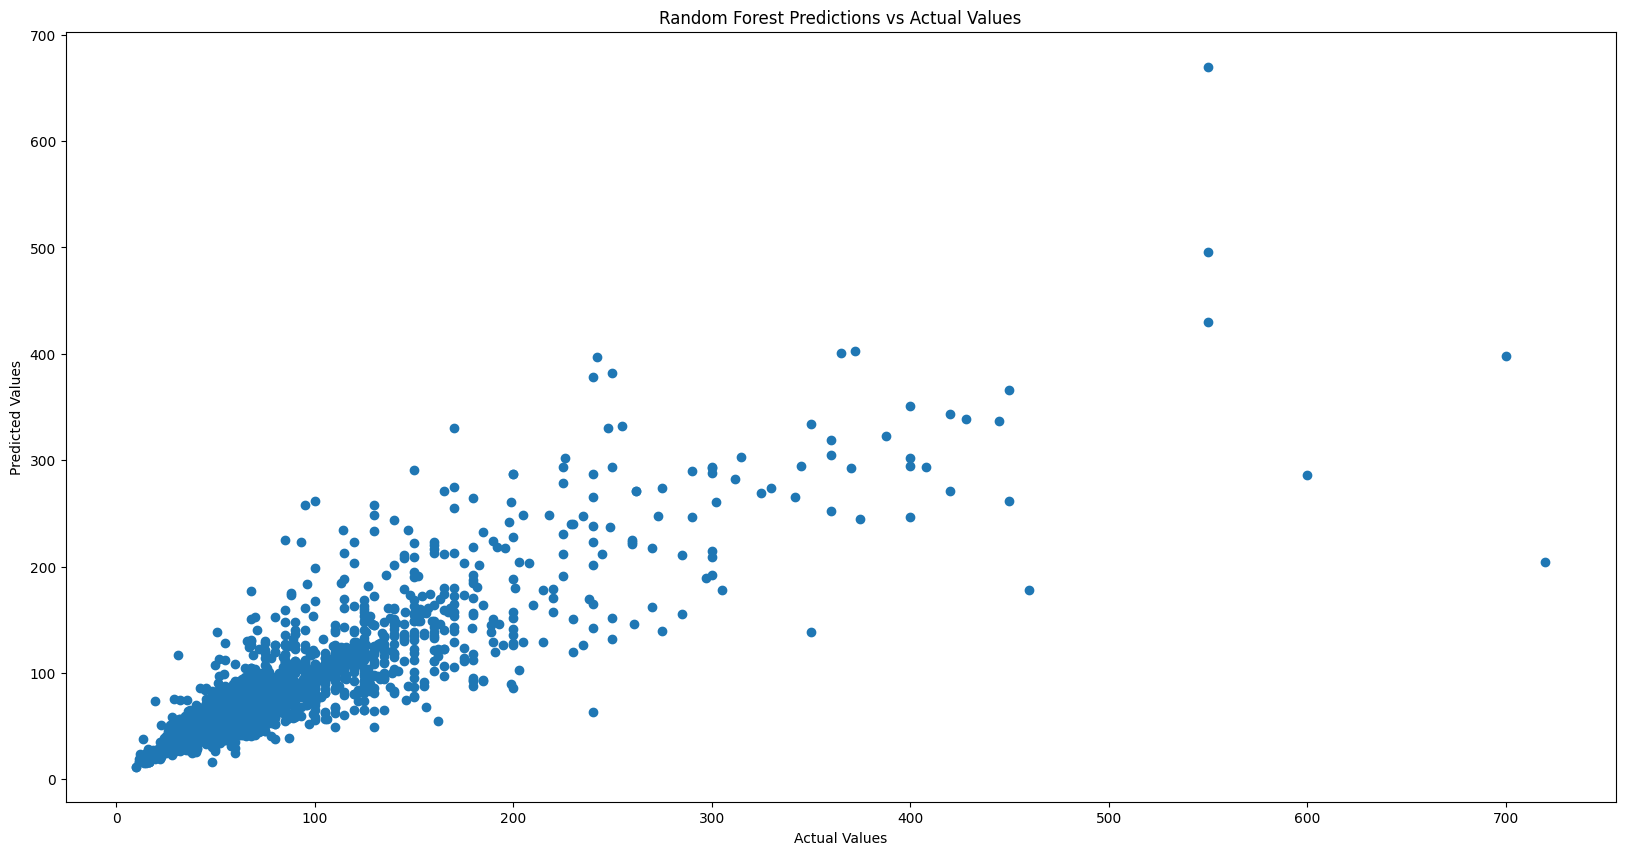

In [81]:
import matplotlib.pyplot as plt

# Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions vs Actual Values')
plt.show()


In [82]:
"""from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)"""

"from sklearn.model_selection import GridSearchCV\n\nfrom sklearn.linear_model import Lasso\nfrom sklearn.tree import DecisionTreeRegressor\n\ndef find_best_model_using_gridsearchcv(X,y):\n    algos = {\n        'lasso': {\n            'model': Lasso(),\n            'params': {\n                'alpha': [1,2],\n                'selection': ['random', 'cyclic']\n            }\n        },\n        'decision_tree': {\n            'model': DecisionTreeRegressor(),\n            'params': {\n                'criterion' : ['mse','friedman_mse'],\n                'splitter': ['best','random']\n            }\n        }\n    }\n    scores = []\n    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)\n    for algo_name, config in algos.items():\n        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)\n        gs.fit(X,y)\n        scores.append({\n            'model': algo_name,\n            'best_score': gs.best_score_,\n            'best_params': g

**BASED ON THE ABOVE RESULTS WE CAN SAY THAT LINEAR REGRESSION GIVES THE BEST SCORE. HENCE WE WILL USE THAT.**

### EXPORT THE TESTED MODEL TO A PICKLE FILE

In [83]:
import pickle

# Save the model to a pickle file
model_filename = 'trained_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f'Model exported to {model_filename}')


Model exported to trained_model.pkl


### EXPORT LOCATION AND COLUMN INFORMATION TO A FILE THAT WILL BE USEFUL LATER ON IN OUR PREDICTION APPLICATION